### What is Selenium?
Selenium is an open-source automation framework used to interact with web browsers. It allows you to:

✅ Open websites programmatically.
✅ Perform clicks, fill forms, and submit data.
✅ Scrape information from web pages.
✅ Automate browser testing.


### What is WebDriver?
A WebDriver is a bridge between Selenium and web browsers. It allows Selenium to control and automate browser actions.

🔹 How WebDriver Works:

Selenium sends commands (e.g., open URL, click, type text).
WebDriver translates commands into browser actions.
The browser executes the actions and sends a response back.


🔹 WebDriver for Different Browsers:
Google Chrome → ChromeDriver

Mozilla Firefox → GeckoDriver

Microsoft Edge → EdgeDriver

Safari → SafariDriver

Each browser requires a compatible WebDriver version.


### What is WebDriver Manager?
webdriver-manager is a Python package that:

✅ Automatically downloads the correct WebDriver version.
✅ Eliminates manual setup of WebDriver paths.
✅ Ensures compatibility with the latest browser updates.


Without webdriver-manager, you would have to manually download and set up the WebDriver every time your browser updates.



The below commands installs both Selenium and webdriver-manager.

In [1]:
!pip install selenium webdriver-manager

### Setting Up Selenium with WebDriver Manager
✅ (Recommended) Using WebDriver Manager (No Path Needed)

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import random

# Set up Chrome options
options = Options()

# 1️⃣ Change User-Agent (Pretend to be a normal browser)
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36")

# 2️⃣ Disable WebDriver flags to avoid detection
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)

# 3️⃣ Start WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# 4️⃣ Open Google
driver.get("https://www.google.com")

# 5️⃣ Add a random delay to mimic human behavior
time.sleep(random.uniform(2, 5))

# 6️⃣ Find the search box and enter a query
search_box = driver.find_element(By.NAME, "q")
search_box.send_keys("Selenium WebDriver")
time.sleep(random.uniform(2, 5))  # Random delay before hitting Enter
search_box.send_keys(Keys.RETURN)

# 7️⃣ Wait for the first search result to load
try:
    first_result = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, "(//h3)[1]"))
    )
    print("First result:", first_result.text)
except Exception as e:
    print("Error:", e)

Error: Message: 
Stacktrace:
	GetHandleVerifier [0x00F702D3+25139]
	(No symbol) [0x00EFB284]
	(No symbol) [0x00DD04A3]
	(No symbol) [0x00E18338]
	(No symbol) [0x00E1868B]
	(No symbol) [0x00E60F62]
	(No symbol) [0x00E3CF84]
	(No symbol) [0x00E5E6E1]
	(No symbol) [0x00E3CD36]
	(No symbol) [0x00E0BD29]
	(No symbol) [0x00E0D064]
	GetHandleVerifier [0x0127B193+3215603]
	GetHandleVerifier [0x0129230A+3310186]
	GetHandleVerifier [0x0128C522+3286146]
	GetHandleVerifier [0x01009CD0+654384]
	(No symbol) [0x00F0460D]
	(No symbol) [0x00F014F8]
	(No symbol) [0x00F01697]
	(No symbol) [0x00EF3D70]
	BaseThreadInitThunk [0x76097BA9+25]
	RtlInitializeExceptionChain [0x7716C0CB+107]
	RtlClearBits [0x7716C04F+191]



### Page Object Model (POM) in Selenium

Page Object Model (POM) is a design pattern in Selenium that helps organize your test automation code by separating the UI elements from the actual test scripts. This improves code reusability, readability, and maintainability. Instead of writing Selenium locators and actions directly in test scripts, POM suggests creating a separate class for each web page. These classes, called Page Classes, contain:
1. Locators (using By).
2. Methods (to perform actions like click(), send_keys(), etc.).

   
The test scripts then call these methods, making the code cleaner and reducing duplication.

In [3]:
import sys
sys.path.append(r"C:\Users\SurjayanDutta\Desktop\100\Selenium.ipynb")


In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time

# Define the GoogleSearchPage class
class GoogleSearchPage:
    def __init__(self, driver):
        self.driver = driver
        self.search_box = (By.NAME, "q")  # Locator for search box

    def enter_search_query(self, query):
        search = self.driver.find_element(*self.search_box)
        search.send_keys(query)

    def submit_search(self):
        search = self.driver.find_element(*self.search_box)
        search.send_keys(Keys.RETURN)


# Main script
if __name__ == "__main__":
    # Configure Chrome options
    chrome_options = Options()
    chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

    # Initialize the WebDriver
    driver = webdriver.Chrome(options=chrome_options)

    try:
        # Open Google
        driver.get("https://www.google.com")
        time.sleep(2)  # Wait for the page to load

        # Create an instance of the GoogleSearchPage class
        search_page = GoogleSearchPage(driver)

        # Enter the search query and submit
        search_page.enter_search_query("Selenium WebDriver")
        time.sleep(2)  # Wait before submitting
        search_page.submit_search()

        # Wait for results
        time.sleep(5)  # Wait for the results page to load
        print("Search completed!")

    finally:
        # Close the browser
        driver.quit()

Search completed!


### What is unittest Framework?
unittest is a built-in Python testing framework that provides:

Test case organization.

Assertions for validating test results.

Test fixtures (setUp and tearDown) for pre- and post-test actions.

### Steps to Enhance POM with unittest
Step 1: Create Page Classes
Each page in your application will have its own class. For example:

GoogleSearchPage: Represents the Google search page.

SearchResultsPage: Represents the search results page.

Step 2: Write Test Cases Using unittest
Create test cases that use the page classes to interact with the application.

Step 3: Integrate with Jupyter Notebook
Use Jupyter Notebook to run and debug your tests interactively.
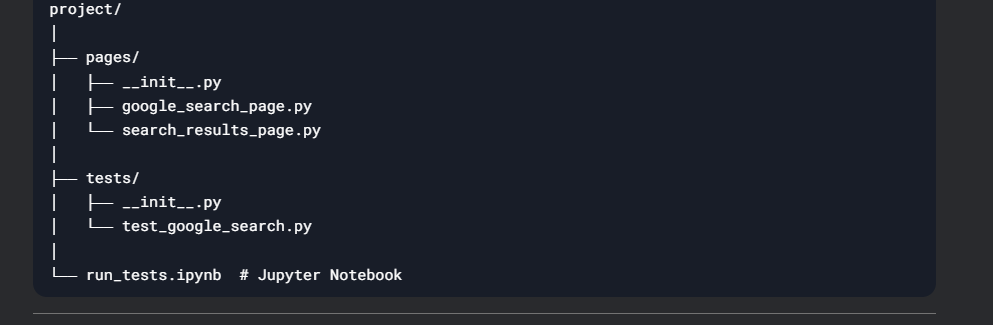

In [13]:
# Import required modules
import unittest
from selenium import webdriver
from selenium.webdriver.common.keys import Keys  # Import Keys here
from pages.google_search_page import GoogleSearchPage
from pages.search_results_page import SearchResultsPage

# Define the test class
class GoogleSearchTest(unittest.TestCase):
    def setUp(self):
        self.driver = webdriver.Chrome()  # Initialize the WebDriver
        self.driver.implicitly_wait(10)  # Set implicit wait

    def test_search_selenium(self):
        # Create page objects
        google_search_page = GoogleSearchPage(self.driver)
        search_results_page = SearchResultsPage(self.driver)

        # Open Google and search for "Selenium"
        google_search_page.open()
        google_search_page.enter_search_query("Selenium")
        google_search_page.submit_search()

        # Verify results
        result_stats = search_results_page.get_result_stats()
        self.assertIn("results", result_stats)  # Assert that results are displayed

    def tearDown(self):
        self.driver.quit()  # Close the browser

# Create a test suite and run the tests
suite = unittest.TestLoader().loadTestsFromTestCase(GoogleSearchTest)
unittest.TextTestRunner().run(suite)

E
ERROR: test_search_selenium (__main__.GoogleSearchTest.test_search_selenium)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\SurjayanDutta\AppData\Local\Temp\ipykernel_6496\2972085510.py", line 22, in test_search_selenium
    google_search_page.submit_search()
  File "C:\Users\SurjayanDutta\Desktop\genai\pages\google_search_page.py", line 15, in submit_search
    def submit_search(self):
                             
NameError: name 'Keys' is not defined

----------------------------------------------------------------------
Ran 1 test in 7.054s

FAILED (errors=1)


<unittest.runner.TextTestResult run=1 errors=1 failures=0>

In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.relative_locator import locate_with
import time

# Start WebDriver
driver = webdriver.Chrome()

# Open a sample webpage
driver.get("https://www.w3schools.com/html/html_forms.asp")

time.sleep(3)  # Wait for page to load

# Locate the "Last Name" input field using "above" the "Email" field
last_name_field = driver.find_element(locate_with(By.TAG_NAME, "input").above(By.NAME, "email"))

# Locate the "Email" field using "below" the "Last Name" field
email_field = driver.find_element(locate_with(By.TAG_NAME, "input").below(By.NAME, "lastname"))

# Print results
print("Last Name Field Found:", last_name_field.get_attribute("name"))
print("Email Field Found:", email_field.get_attribute("name"))

# Close browser
driver.quit()


TypeError: RelativeBy.above() takes from 1 to 2 positional arguments but 3 were given

In [14]:
import pytest
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

@pytest.fixture
def setup():
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get("https://www.example.com/login")  # Replace with actual login page
    yield driver
    driver.quit()

def test_login(setup):
    driver = setup
    username = driver.find_element(By.ID, "username")  # Use appropriate selector
    password = driver.find_element(By.ID, "password")  # Use appropriate selector
    submit_button = driver.find_element(By.ID, "login-btn")  # Use appropriate selector

    # Enter login details
    username.send_keys("testuser")
    password.send_keys("password123")
    submit_button.click()

    # Verify login success (assuming redirected to a dashboard page)
    assert "Dashboard" in driver.title
